<a href="https://colab.research.google.com/github/sudeepmathew/Voice-Of-Customer/blob/sudeepmathew-VOC_LDA/Ngram_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("/gdrive/My Drive/MGHectorComments.csv")

In [4]:
data.head()

,selection1_name
0,Quote:\nOriginally Posted by blackwasp\nThanks...
1,What's happening with the names of cars these ...
2,Quote:\nOriginally Posted by blackwasp\nThanks...
3,Just quickly Googled about this Hector/Baojun ...
4,Quote:\nOriginally Posted by rovingeye\nJust q...


# Fetch word count for each Review


In [5]:
#Fetch wordcount for each abstract
data['word_count'] = data['selection1_name'].apply(lambda x: len(str(x).split(" ")))
data[['selection1_name','word_count']].head()

,selection1_name,word_count
0,Quote:\nOriginally Posted by blackwasp\nThanks...,37
1,What's happening with the names of cars these ...,56
2,Quote:\nOriginally Posted by blackwasp\nThanks...,128
3,Just quickly Googled about this Hector/Baojun ...,22
4,Quote:\nOriginally Posted by rovingeye\nJust q...,40


In [6]:
##Descriptive statistics of word counts
data.word_count.describe()

count     892.000000
mean      131.289238
std       151.067913
min         2.000000
25%        56.000000
50%        91.000000
75%       156.000000
max      1885.000000
Name: word_count, dtype: float64

# Most common and uncommon words

In [8]:
#Identify common words
freq = pd.Series(' '.join(data['selection1_name']).split()).value_counts()[:20]
freq

the     6448
to      2775
a       2554
and     2505
I       2137
is      1989
of      1960
in      1866
for     1274
that    1123
it      1081
be      1000
on       978
by       957
with     929
have     845
are      802
this     699
The      698
not      691
dtype: int64

In [10]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data 
         ['selection1_name']).split()).value_counts()[-20:]
freq1


team-bhp,     1
"chinese"     1
situation.    1
exteriors)    1
Outer         1
knobs.        1
area,         1
Captiva's     1
feared        1
Lag           1
bat           1
Fortuner!     1
deacls,       1
inventory     1
subscribe     1
Anything      1
88            1
commences     1
lakhs?        1
CarPlay       1
dtype: int64

# Text Pre-processing

####Text pre-processing can be divided into two broad categories — noise removal & normalization. Data components that are redundant to the core text analytics can be considered as noise.


In [13]:
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Stop Word Removal and adding Custom Stop Word

Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http"]
stop_words = stop_words.union(new_words)

# Building Cleaned Corpus

In [0]:
corpus = []
for i in range(0, 892):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['selection1_name'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [25]:
#View corpus item
print(corpus[100])

jailbird fynix mg hector club india fb page diesel sharp variant lost count number similar post attachment mod please remove inappropriate actually found person car saw car road side bonnet open added smoke burning comment people found registration number person actual confronted acknowledged saw car road clicked pic


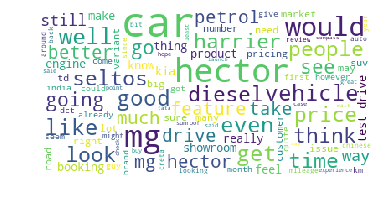

In [36]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))


max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.


max_features — determines the number of columns in the matrix.


n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.


An encoded vector is returned with a length of the entire vocabulary.

In [38]:
# Listing a Review in bag of Word
list(cv.vocabulary_.keys())[:10]

['thanks',
 'automobile',
 'encyclopedia',
 'sending',
 'image',
 'seen',
 'quite',
 'time',
 'city',
 'never']

# **Visualize top N uni-grams, bi-grams & tri-grams**

[Text(0, 0, 'car'),
 Text(0, 0, 'hector'),
 Text(0, 0, 'mg'),
 Text(0, 0, 'would'),
 Text(0, 0, 'like'),
 Text(0, 0, 'diesel'),
 Text(0, 0, 'petrol'),
 Text(0, 0, 'well'),
 Text(0, 0, 'drive'),
 Text(0, 0, 'good'),
 Text(0, 0, 'even'),
 Text(0, 0, 'vehicle'),
 Text(0, 0, 'price'),
 Text(0, 0, 'seltos'),
 Text(0, 0, 'harrier'),
 Text(0, 0, 'time'),
 Text(0, 0, 'get'),
 Text(0, 0, 'look'),
 Text(0, 0, 'dct'),
 Text(0, 0, 'kmpl')]

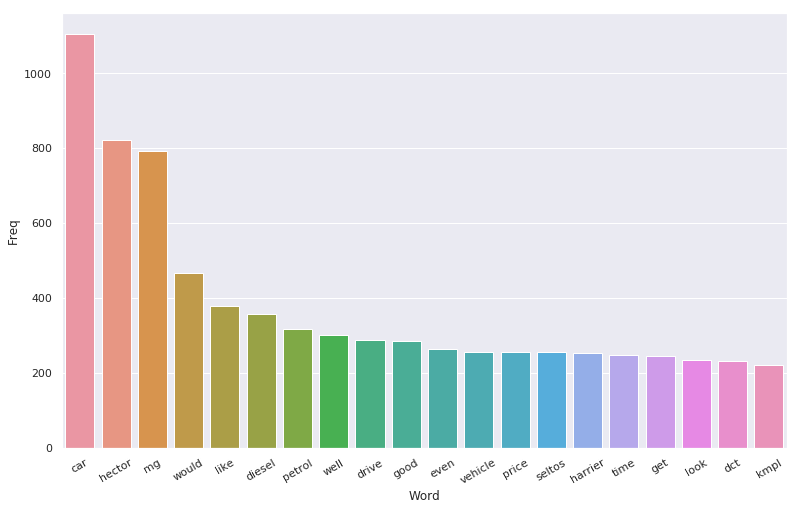

In [39]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0           mg hector   145
1          test drive   118
2          petrol dct    53
3       voice command    43
4    petrol automatic    43
5           look like    39
6             top end    39
7            team bhp    35
8         much better    32
9          real world    31
10  panoramic sunroof    30
11      build quality    28
12          rear seat    27
13         would like    25
14          dct sharp    25
15        even though    25
16           mg motor    24
17         fit finish    24
18        ex showroom    24
19          kmpl city    24


[Text(0, 0, 'mg hector'),
 Text(0, 0, 'test drive'),
 Text(0, 0, 'petrol dct'),
 Text(0, 0, 'voice command'),
 Text(0, 0, 'petrol automatic'),
 Text(0, 0, 'look like'),
 Text(0, 0, 'top end'),
 Text(0, 0, 'team bhp'),
 Text(0, 0, 'much better'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'panoramic sunroof'),
 Text(0, 0, 'build quality'),
 Text(0, 0, 'rear seat'),
 Text(0, 0, 'would like'),
 Text(0, 0, 'dct sharp'),
 Text(0, 0, 'even though'),
 Text(0, 0, 'mg motor'),
 Text(0, 0, 'fit finish'),
 Text(0, 0, 'ex showroom'),
 Text(0, 0, 'kmpl city')]

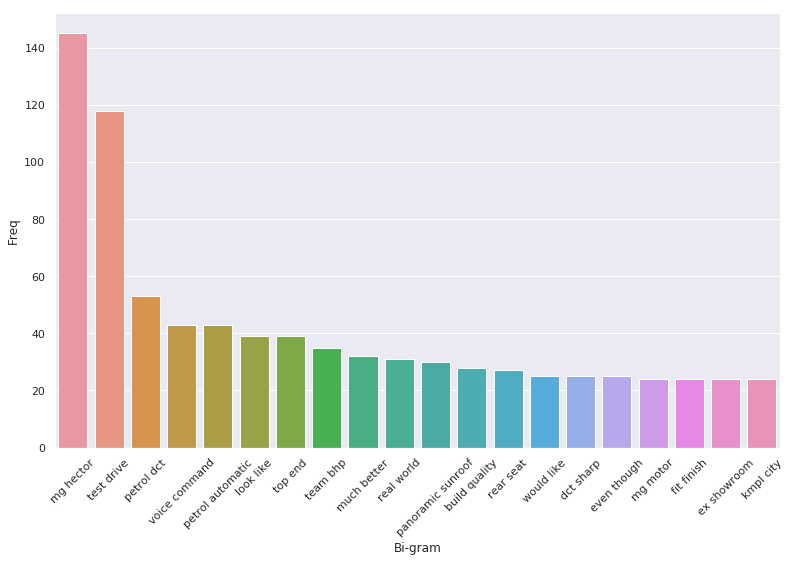

In [40]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                   Tri-gram  Freq
0            http com watch    16
1            mg motor india    13
2          short test drive    13
3             diesel mt lac    12
4        quality fit finish    10
5           took test drive    10
6           team bhp review    10
7        rain sensing wiper    10
8        test drive vehicle     9
9         another mg hector     9
10  stranded dusty polluted     9
11        year unlimited km     9
12        build quality fit     8
13         petrol dct sharp     8
14        presume mg hector     8
15           mg hector case     8
16         hector case fool     8
17          case fool money     8
18          fool money soon     8
19        money soon parted     8


[Text(0, 0, 'http com watch'),
 Text(0, 0, 'mg motor india'),
 Text(0, 0, 'short test drive'),
 Text(0, 0, 'diesel mt lac'),
 Text(0, 0, 'quality fit finish'),
 Text(0, 0, 'took test drive'),
 Text(0, 0, 'team bhp review'),
 Text(0, 0, 'rain sensing wiper'),
 Text(0, 0, 'test drive vehicle'),
 Text(0, 0, 'another mg hector'),
 Text(0, 0, 'stranded dusty polluted'),
 Text(0, 0, 'year unlimited km'),
 Text(0, 0, 'build quality fit'),
 Text(0, 0, 'petrol dct sharp'),
 Text(0, 0, 'presume mg hector'),
 Text(0, 0, 'mg hector case'),
 Text(0, 0, 'hector case fool'),
 Text(0, 0, 'case fool money'),
 Text(0, 0, 'fool money soon'),
 Text(0, 0, 'money soon parted')]

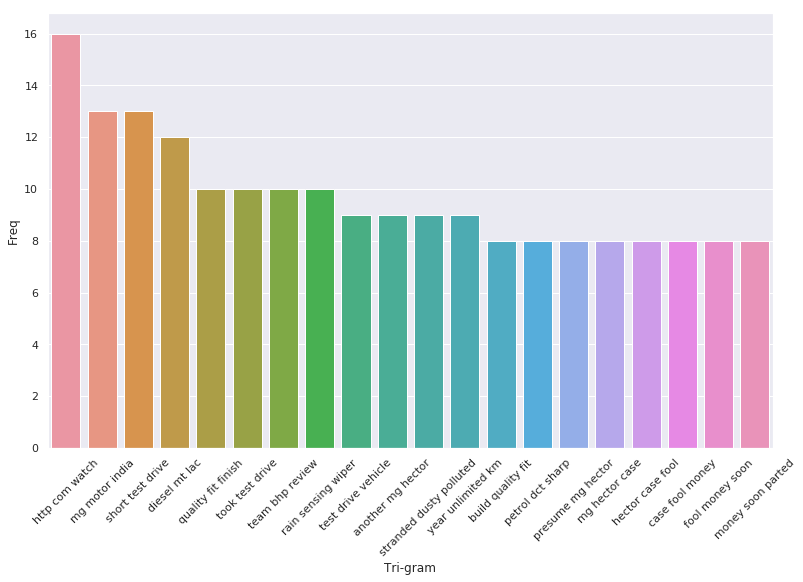

In [41]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)